In [2]:
import numpy as np

# Cargar los archivos .npy
X_trad = np.load('X_trad.npy')
image_ids = np.load('image_ids.npy', allow_pickle=True)


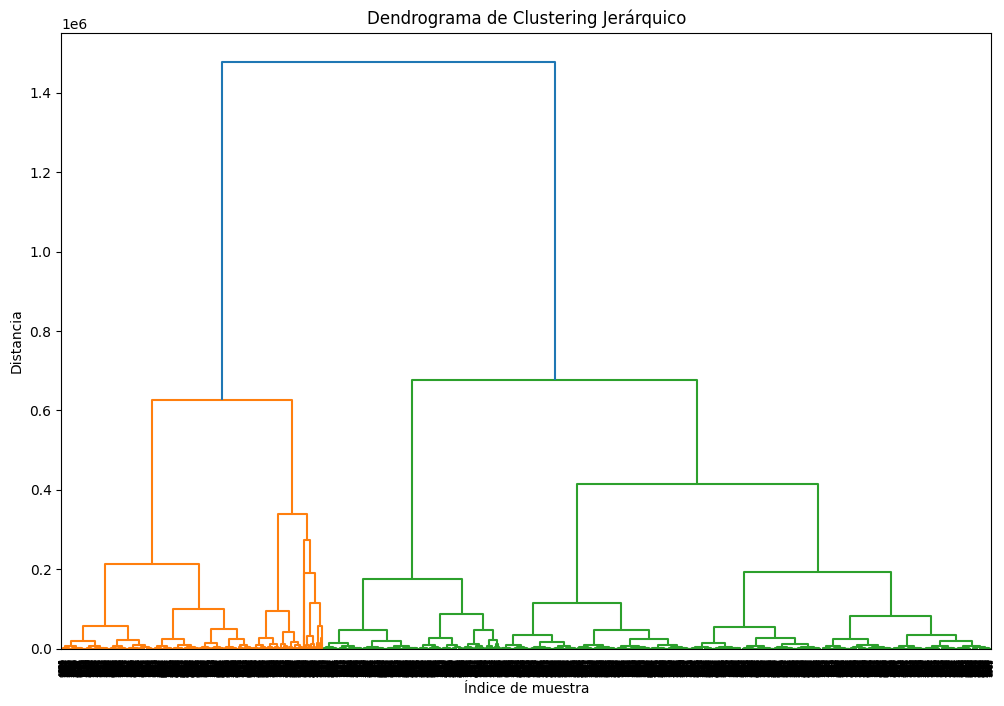

Número de muestras por cluster: [  0 325 305 307 368 188 159   7  78  29  14   1 654 306 256 520 769 350
 545 483 674]


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Realizar clustering jerárquico
linkage_matrix = linkage(X_trad, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

# Obtener clusters (ejemplo con 3 clusters)
clusters = fcluster(linkage_matrix, t=20, criterion='maxclust')
print(f"Número de muestras por cluster: {np.bincount(clusters)}")


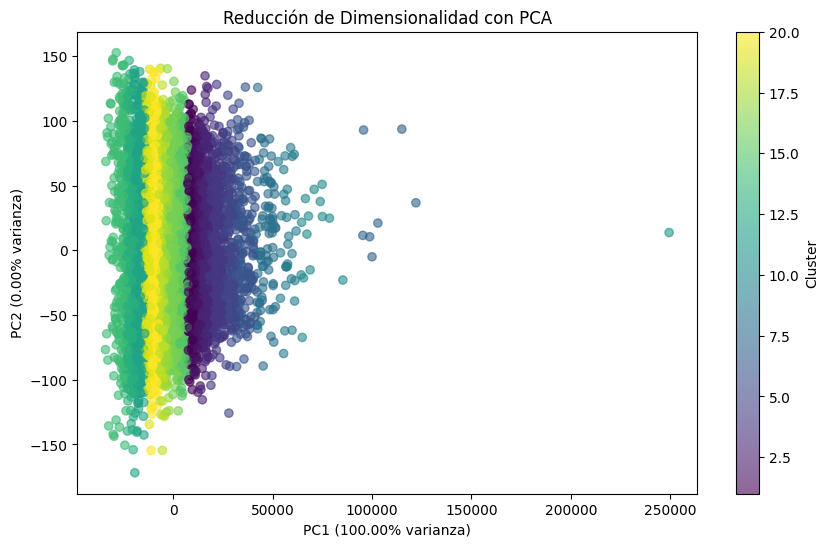

C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


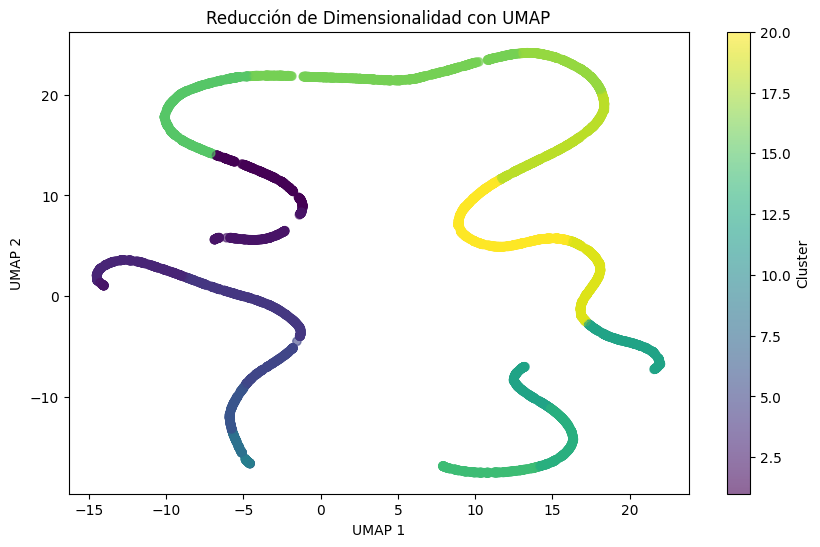

In [17]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_trad)

# Visualizar PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.show()

# Reducción de dimensionalidad con UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_trad)

# Visualizar UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


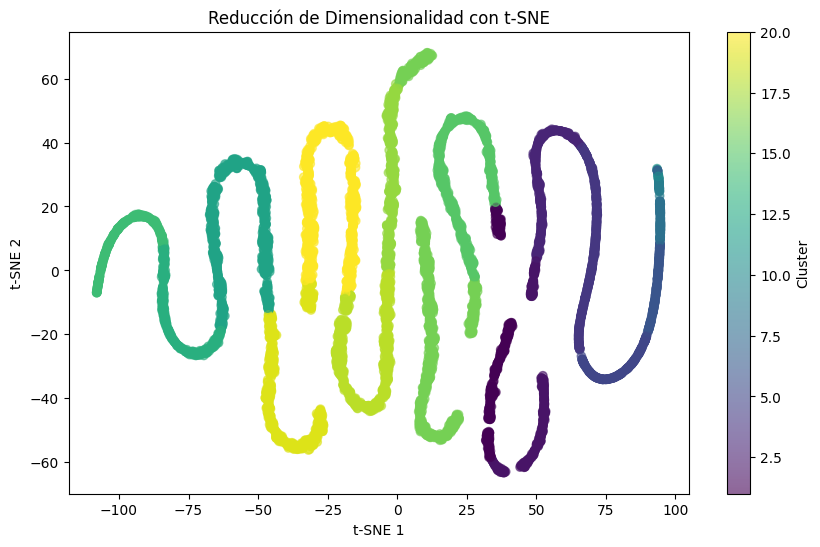

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_trad)

# Visualizar t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


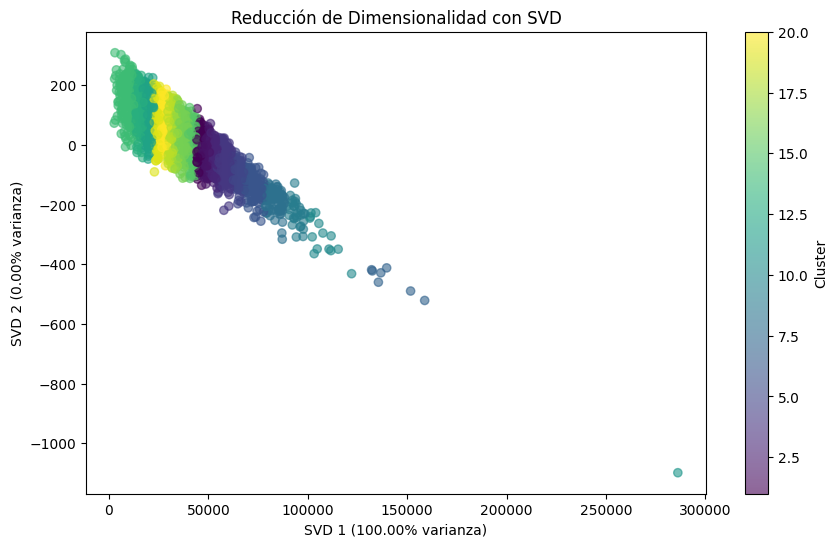

In [19]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_trad)

# Visualizar SVD
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con SVD')
plt.xlabel(f'SVD 1 ({svd.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'SVD 2 ({svd.explained_variance_ratio_[1]:.2%} varianza)')
plt.show()


Número de muestras por cluster: [605 266 556  10  78 296 598 407   1 134 626 418 588 213  33 493 521 366
 122   7]
Inercia (suma de distancias al cuadrado): 12293184512.00


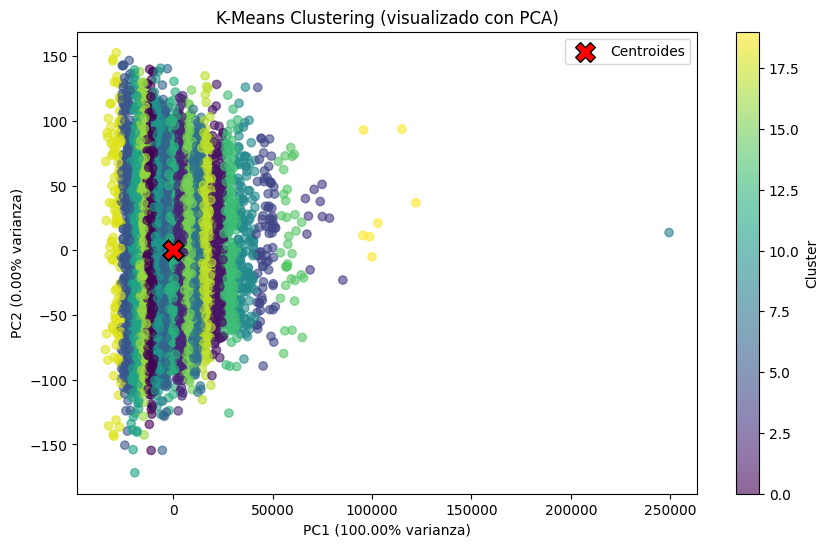

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Realizar K-Means clustering
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_trad)

print(f"Número de muestras por cluster: {np.bincount(kmeans_clusters)}")
print(f"Inercia (suma de distancias al cuadrado): {kmeans.inertia_:.2f}")

# Visualizar con PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, :2] @ pca.components_,
            kmeans.cluster_centers_[:, :2] @ pca.components_,
            c='red', marker='X', s=200, edgecolors='black', label='Centroides')
plt.title('K-Means Clustering (visualizado con PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.legend()
plt.show()


C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


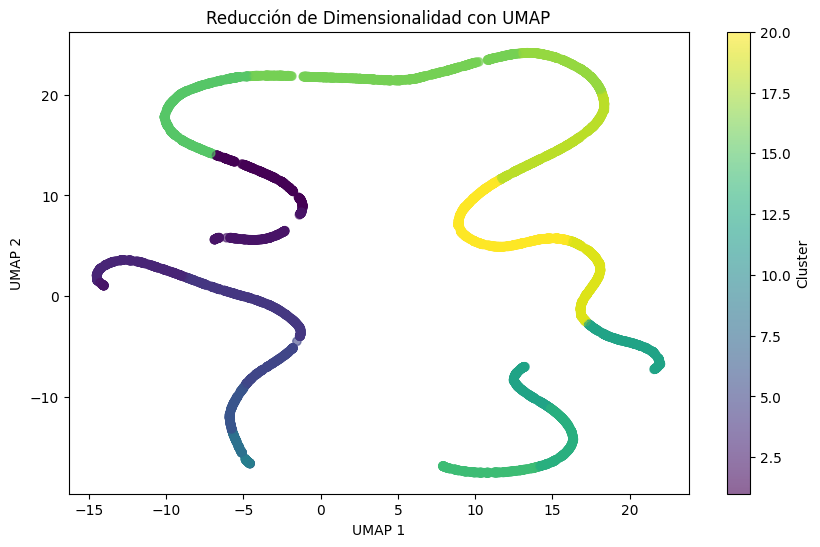

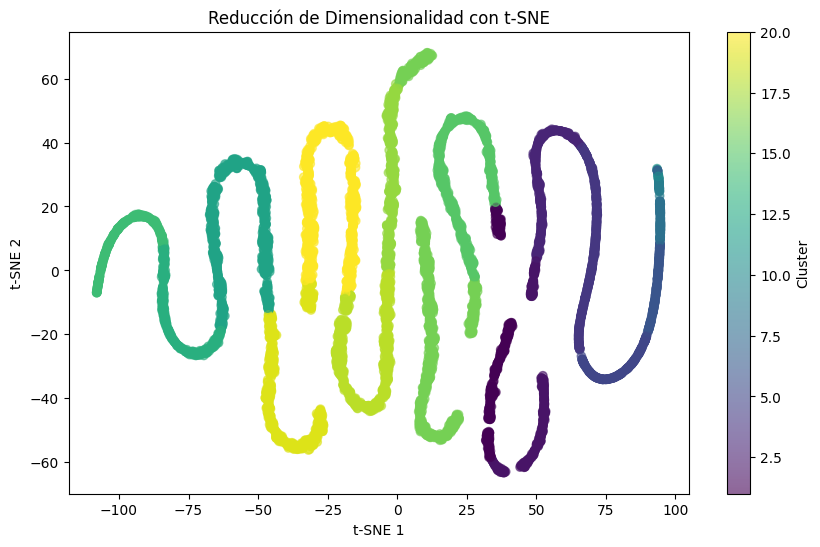

In [23]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_trad)

# Visualizar UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_trad)

# Visualizar t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


Número de clusters: 0
Número de puntos de ruido: 6338
Número de muestras por cluster: []


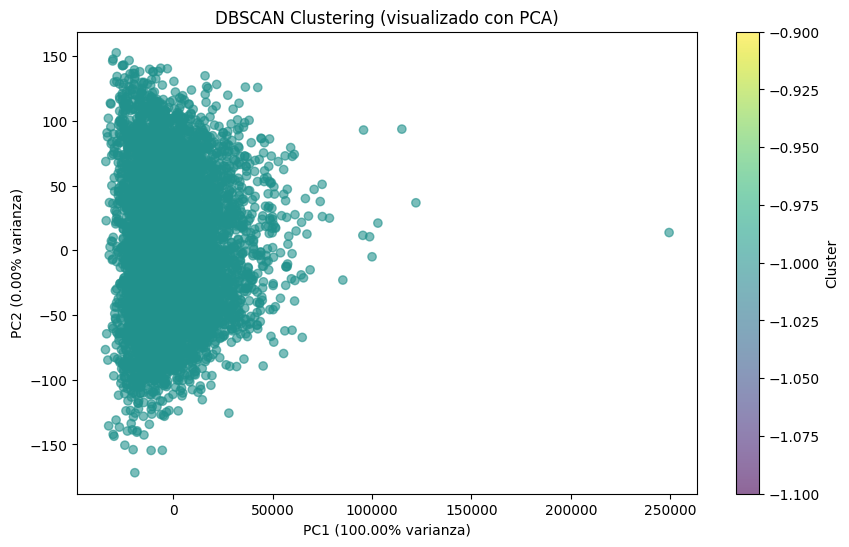

In [28]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Realizar DBSCAN clustering
dbscan = DBSCAN(eps=500, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_trad)

# Contar clusters y ruido
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")
print(f"Número de muestras por cluster: {np.bincount(dbscan_clusters[dbscan_clusters >= 0])}")

# Visualizar con PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering (visualizado con PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.show()


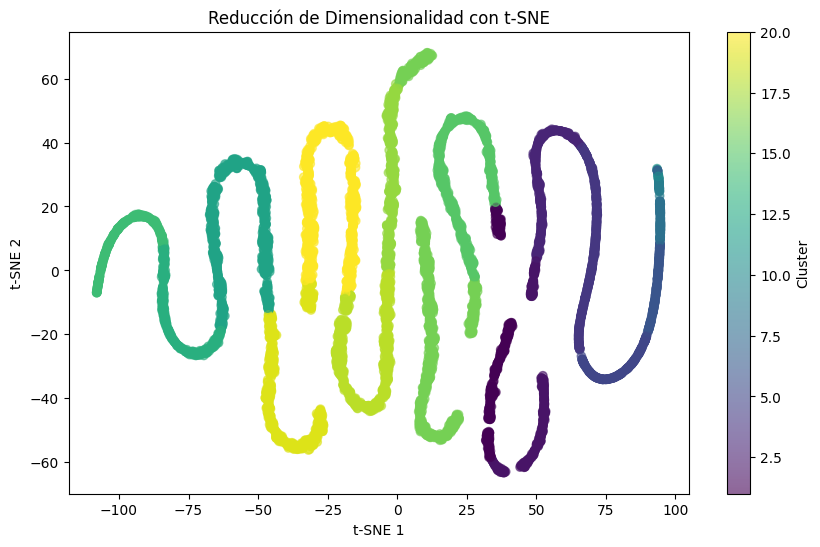

C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


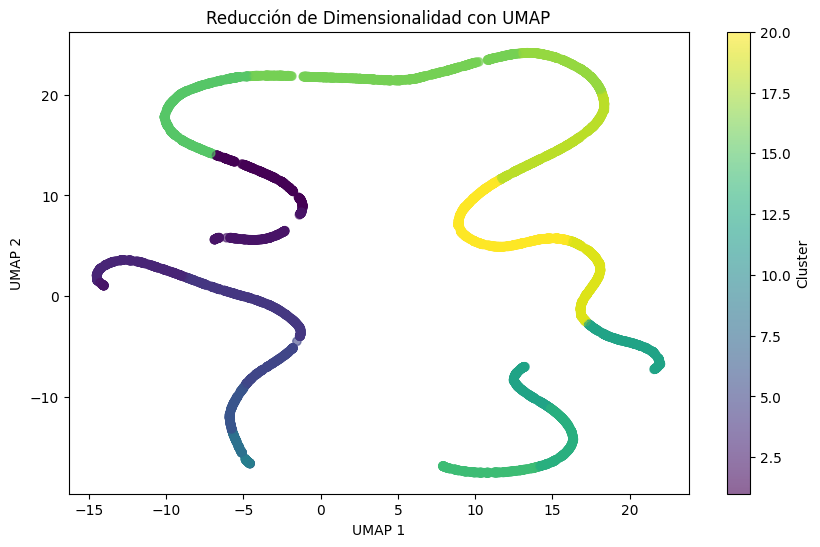

In [29]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_trad)

# Visualizar t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Reducción de dimensionalidad con UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_trad)

# Visualizar UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Reducción de Dimensionalidad con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
